# Punto Interior

Considere el siguiente problema de optimización:

\begin{align*}
		\min_{x_1,x_2} x_1 + x_2 \\
		\mbox{s.t. } x_1 \geq -1 \\
								 x_2 \geq -1 \\
\end{align*}

Empezamos dibujando la region de factibilidad para este problema y las lineas de contorno de la función objetivo. Donde esta la solución optima?

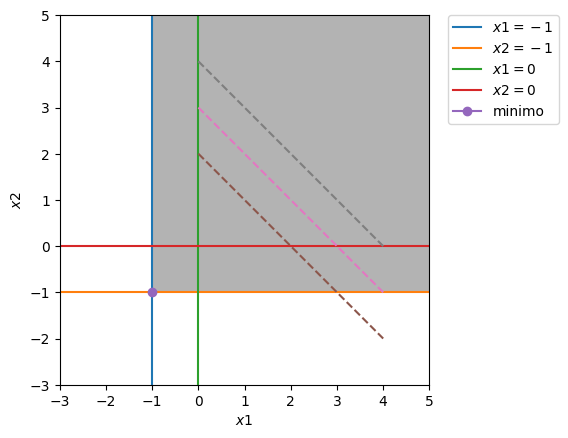

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# graficar region factible
d = np.linspace(-3,5,300)
x,y = np.meshgrid(d,d)
plt.imshow(((x>=-1) & (y>=-1)).astype(int) ,
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# graficar las lineas que defienen las restricciones
x = np.linspace(-3, 5, 500)
y = np.linspace(-3, 5, 500)

xl = np.linspace(0, 4, 500)

# Hacer grafico
plt.plot(-1*np.ones_like(y), y, label=r'$x1=-1$')
plt.plot(x, -1*np.ones_like(x), label=r'$x2=-1$')
plt.plot(0*np.ones_like(y), y, label=r'$x1=0$')
plt.plot(x, 0*np.ones_like(x), label=r'$x2=0$')

plt.plot(-1, -1, '-o', label=r'minimo')
for i in range(2,5):
    plt.plot(xl, i-xl, '--')
plt.xlim(-3,5)
plt.ylim(-3,5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')
plt.show()

Ahora definimos la funcion Lagrangiana, $L (x_1, x_2, \lambda_1, \lambda_2)$.
<br>
<br>
Debido que tenemos 2 restricciones, necesitamos dos multiplicadores de Lagrange $\lambda_1$ y $\lambda_2$.
<br>
$$L (x_1, x_2, \lambda_1, \lambda_2) = x_1 + x_2 - \lambda_1 (x_1 + 1) - \lambda_2 (x_2 + 1)$$
    
\begin{align}
\nabla_\mathbf x L  =  \left[\begin{array}{c} 1-\lambda_1 \\ 1-\lambda_2 \\ \end{array}\right] &= \left[\begin{array}{c} 0  \\ 0  \\ \end{array}\right] \\
x_1 + 1 & \geq  0  \\
x_2 + 1 & \geq  0 \\
\lambda_1, \lambda_2 & \geq  0 \\
\lambda_1 \left( x_1 + 1 \right) & =  0 \\
\lambda_2 \left( x_2 + 1 \right) & =  0
\end{align}

Notese que aunque nuestro problema origianl es un LP, el sistema de ecuaciones KKT es no lineal. Esto debido al producto de los lambdas y los $x$ en las dos ultimas ecuaciones, que corresponden a la holgura complementaria.

Transformamos las desigualdades del sistema de ecuaciones no-lineales resulante, en igualdades por medio de la introduccion de variables de holgura.

Introducimos dos variables de holgura  $s_1 \geq 0$ y $s_2 \geq 0$, las desigualdades, $x_1 \geq -1$ y $x_2 \geq -1$, pueden ser transformadas en igualdades.
<br>
Entonces, definimos $s_1 = x_1 + 1$ y $s_2 = x_2 + 1$. Entonces, las condiciones KKT pueden ser reescritas como:
    
\begin{align}
\nabla_\mathbf{x} L  =  \left[\begin{array}{c} 1-\lambda_1 \\ 1-\lambda_2 \\ \end{array}\right] &= \left[\begin{array}{c} 0  \\ 0  \\ \end{array}\right] \\
x_1 + 1 - s_1 & =  0 \\
x_2 + 1 - s_2 & =  0 \\
\qquad s_1, s_2 & \geq  0 \\
\lambda_1, \lambda_2 & \geq  0 \\
\lambda_1 s_1 & =  0 \\
\lambda_2 s_2 & =  0
\end{align}   


La idea general de los metodos de punto interior es aplicar el metodo de Newton (para encontrar raices) y solucionar (de manera aproximada) las condiciones KKT.

Cuando aplicamos el metodo de Newton a las ecuaciones mencionadas arriba, vemos que las convergencia es muy lenta. La razon para esto son las restricciones complementarias. Entonces, estas equaciones son aproximadas por un parametro positivo $\tau >0$.
$$
		\lambda_1 s_1 =  \tau\quad (1)\\
		\lambda_2 s_2 =  \tau\quad (2)
$$
<br>
El conjunto factible de las restricciones complementarias ahora lucen como:   
<img src="https://raw.githubusercontent.com/cgl-itm/Optimizacion-ITM/main/notebooks/figuras/HU83.png" width="400">


Solucionar el sistema de ecuaciones no lineales de manera analitica:

Desde la estacionariedad, sabemos que $\lambda_1=1$ y $\lambda_2=1$.
<br>
De las condiciones complementarias modificadas, sabes que $s_1= \frac{\tau}{\lambda_1}$ y $s_1 = \frac{\tau}{\lambda_2}$.
<br>
De las restricciones de igualdad, podemos calcular $x_1$ y $x_2$ como $x_1 = \frac{\tau}{\lambda_1}-1$ y $x_2 = \frac{\tau}{\lambda_2}-1$.


Dibujar el camino central en el dominio de $x_1$ y $x_2$ para diferentes valores de $\tau$:

Para $\tau \rightarrow 0$, la solucion se mueve a la solucion del problema original.
<br>
$x_1 = \frac{\tau}{\lambda_1}-1$ y $x_2 = \frac{\tau}{\lambda_2}-1$
<br>
$\lambda_1=1$ y $\lambda_2=1$    
<img src="https://raw.githubusercontent.com/cgl-itm/Optimizacion-ITM/main/notebooks/figuras/HU84.png" width="400">


Dibujar el conjunto de factibilidad de las restricciones complementarias para diferentes valores de $\tau$:

Para $\tau \rightarrow 0$, la solución se mueve al limite izquierdo del conjunto factible.
<img src="https://raw.githubusercontent.com/cgl-itm/Optimizacion-ITM/main/notebooks/figuras/HU85.png" width="400">    
</details>

Escribir el paso de Newton para solucionar las condiciones KKT aproximadas:
<br>
Tipicamente, el sistema de ecuaciones es muy complejo o imposible de solucionar analiticamente. Entonces, queremos solucionarlo usando el metodo de Newton (para determinar raices).
<br>
<br>
Un paso del metodo de Newton se puede escribir como:
$$\mathbf x^{k+1} = \mathbf x^k - \frac{f(\mathbf x^k)}{f'(\mathbf x^k)} $$
<br>
$$\implies \delta \mathbf x^k = - \frac{f(\mathbf x^k)}{f'(\mathbf x^k)} $$
<br>
$$\implies f'(\mathbf x^k) \, \delta \mathbf x^k = - f(\mathbf x^k)$$
    
donde, solucionamos para $\delta \mathbf x^k$ para movernos a la siguiente iteración.<br>
<br>
Sí $||\delta \mathbf x_k|| \lt \epsilon$ para un pequeño $\epsilon$, esto es,
dos iteraciones consecutivas esta suficienteme cerca, el algoritmo de Newton para y retorna $x_{k+1}$ como la raiz.
<br>
<br>
Ahora, queremos aplicar el paso de Newton a nuestro sistema. Las variables, que queremos determinar, son $x_1, x_2, \lambda_1, \lambda_2, s_1$ y $s_2$.
<br>
<br>
Definimos:
<br>
$\delta x_{1,k} = x_{1,k+1}-x_{1,k}$,
<br>    
$\delta x_{2,k} = x_{2,k+1}-x_{2,k}$,
<br>    
$\delta \lambda_{1,k} = \lambda_{1,k+1}-\lambda_{1,k}$,
<br>    
$\delta \lambda_{2,k} = \lambda_{2,k+1}-\lambda_{2,k}$,
<br>    
$\delta s_{1,k} = s_{1,k+1}-s_{1,k}$ and
<br>    
$\delta s_{2,k} = s_{2,k+1}-s_{2,k}$.
<br>
<br>
Entonces escribimos la $k$-ésima iteración como:
<br>
$$\left[\begin{array}{cccccc}
    0 & 0 &     0     &     0     & -1  &  0  \\
    0 & 0 &     0     &     0     &  0  & -1  \\
    1 & 0 &    -1     &     0     &  0  &  0  \\
    0 & 1 &     0     &     0     & -1  &  0  \\
    0 & 0 & \lambda_1 &     0     & s_1 &  0  \\
    0 & 0 &     0     & \lambda_2 &  0  & s_2
\end{array}\right]
\cdot \left[\begin{array}{c}
\delta x_{1,k}\\
\delta x_{2,k}\\
\delta s_{1,k}\\
\delta s_{2,k}\\
\delta \lambda_{1,k}\\
\delta \lambda_{2,k}\\
\end{array}\right] =
- \left[\begin{array}{c}
1-\lambda_1\\
1-\lambda_2\\
x_1 + 1 - s_1\\
x_2 + 1 - s_2\\
\lambda_1 s_1\\
\lambda_2 s_2\\
\end{array}\right]
+ \left[\begin{array}{c}
0\\
0\\
0\\
0\\
\tau\\
\tau\\
\end{array}\right]$$
<br>
Notese, que este es siemplere un sistema lineal de ecuaciones, aunque la funcion original $f$ es no lineal.    
</details>

Solucionaremos este sistema usando el siguiente codigo de Python.

In [10]:
import autograd
import autograd.numpy as np

# RHS of linear system
def F(Z, tau):
    x1 = Z[0]
    x2 = Z[1]
    s1 = Z[2]
    s2 = Z[3]
    l1 = Z[4]
    l2 = Z[5]
    F = np.array([1-l1,
         1-l2,
         x1+1-s1,
         x2+1-s2,
         l1*s1 - tau,
         l2*s2 - tau])
    return F

Tipicamente, es muy dificil encontrar un punto inicial estrictamente factible. Aqui, podemos seleccionar un punto aleatorio porque el problema es muy pequeño.

In [11]:
 def solve(tau):

    # punto inicial para el problema original
    Z = np.ones(6)

    # punto inigial Metodo de Newton
    deltaZ = np.ones(6)

    # tolerancia de la convergencia
    tol = 1e-5

    # f_prime
    jac = autograd.jacobian(F, 0)

    it=0

    while np.linalg.norm(deltaZ) > tol:
        it=it+1

        f_prime = jac(Z,tau)
        f = F(Z,tau)

        # solucionar el sistema lineal de ecuaciones
        deltaZ = np.linalg.solve(f_prime, -f)

        Z = Z + deltaZ

    return Z, it

In [12]:
# lista con diferentes valores de tau
tau = [1.0, 0.5, 0.25, 0.125, 1e-2, 1e-3, 1e-5]
print("{:<10} {:<20} {:^10}".format('tau','minimo','iter'))
for itau in tau:
    Zopt, it = solve(itau)
    print ("{:<10} [{:^8.4f}, {:^8.4f}] {:<4} {:<20d}".format(itau,Zopt[0],Zopt[1],' ',it))

tau        minimo                  iter   
1.0        [ 0.0000 ,  0.0000 ]      2                   
0.5        [-0.5000 , -0.5000 ]      2                   
0.25       [-0.7500 , -0.7500 ]      2                   
0.125      [-0.8750 , -0.8750 ]      2                   
0.01       [-0.9900 , -0.9900 ]      2                   
0.001      [-0.9990 , -0.9990 ]      2                   
1e-05      [-1.0000 , -1.0000 ]      2                   
